In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1138,2020-07-27,United Kingdom,299697.0,299426.0,45897.0,45752.0,271.0,145.0
1139,2020-07-27,Germany,206060.0,205609.0,9132.0,9118.0,451.0,14.0
1140,2020-07-27,Iran,288112.0,291172.0,15216.0,15700.0,-3060.0,-484.0
1141,2020-07-27,Turkey,226067.0,226100.0,5612.0,5613.0,-33.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3396.668416447944
RMSE =  9262.888747159668


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  292.9002624671916
RMSE =  689.7479353707457


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  18254.372727272726
RMSE =  26113.422951181117
-- World performances for deaths --
MAE =  1569.6090909090908
RMSE =  1907.7557996004339


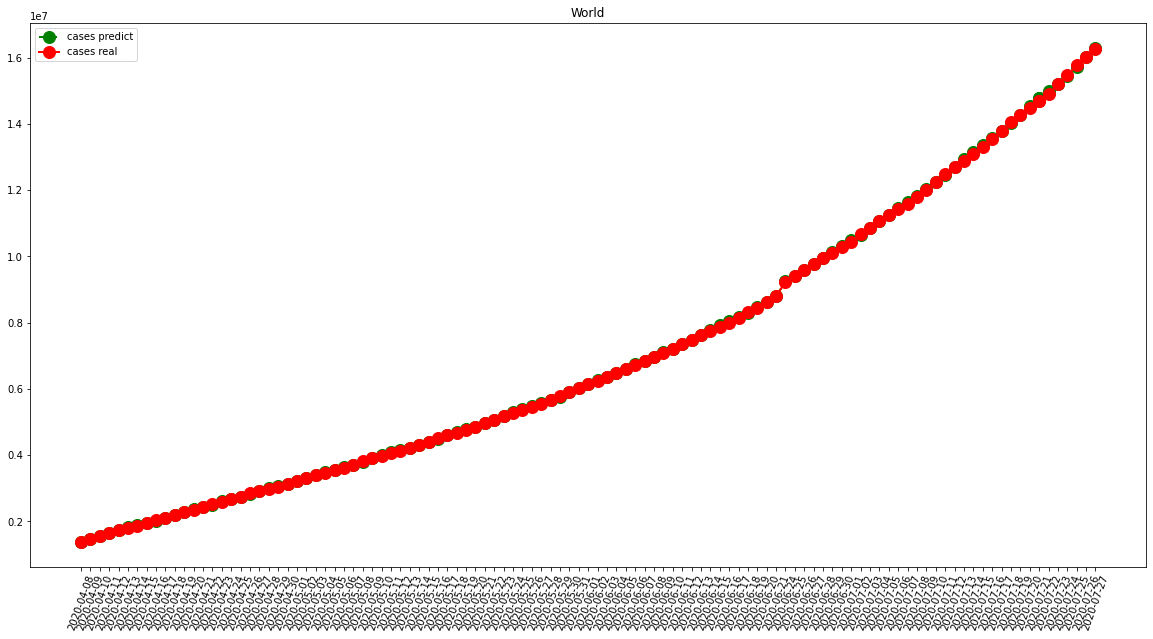

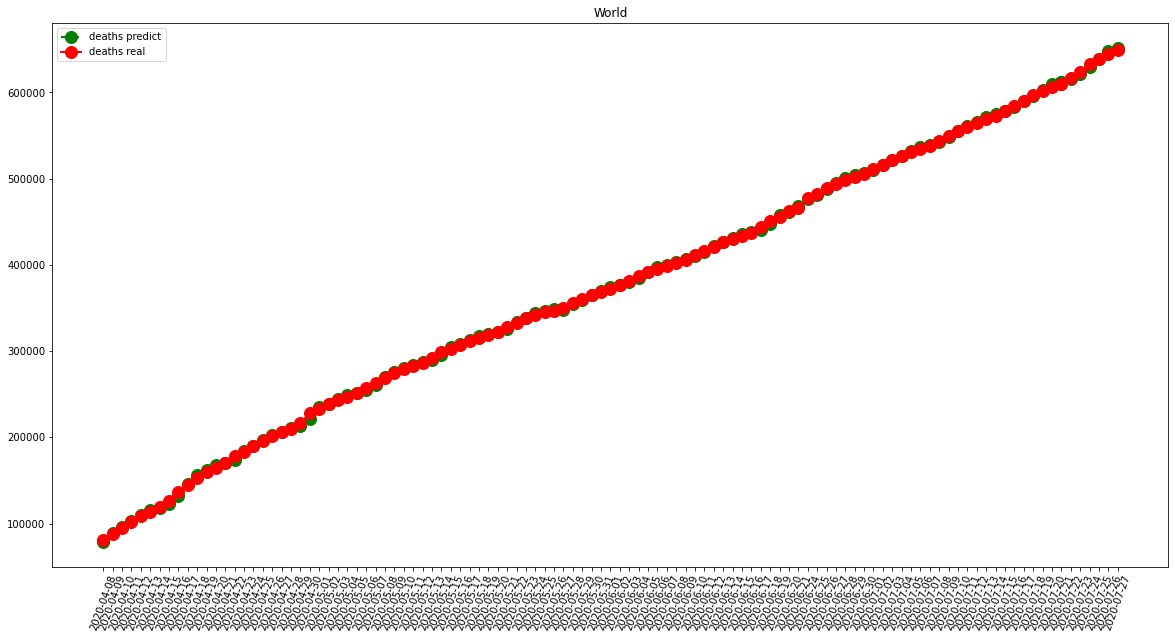

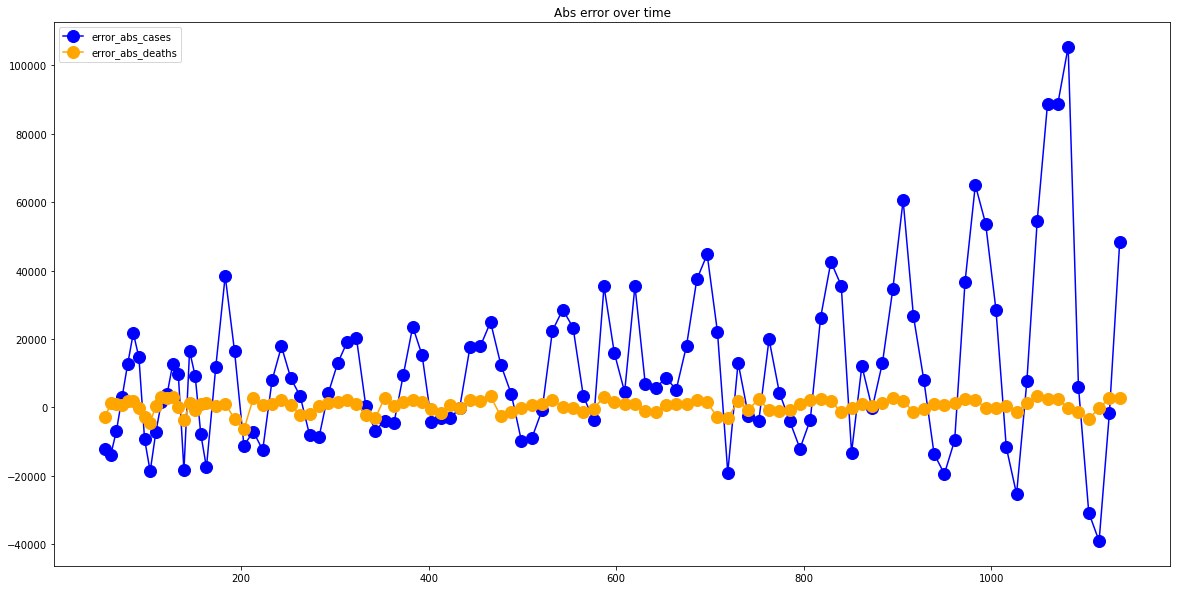

In [7]:
visShow("World")

-- France performances for cases --
MAE =  845.3666666666667
RMSE =  1368.1659865186923
-- France performances for deaths --
MAE =  150.15833333333333
RMSE =  305.93984975263794


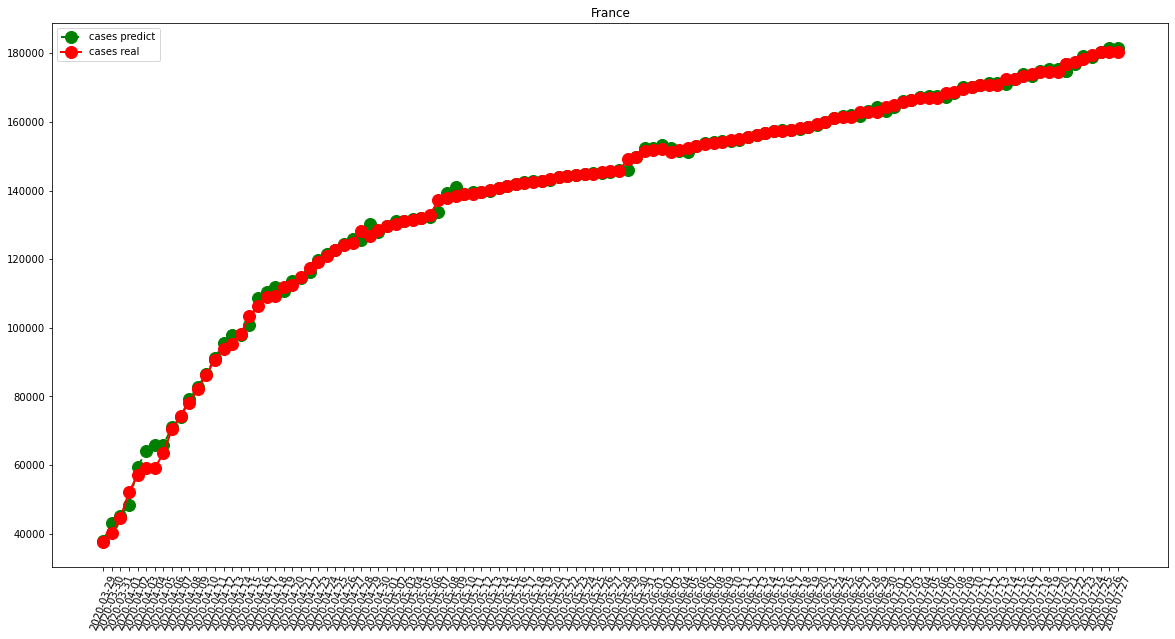

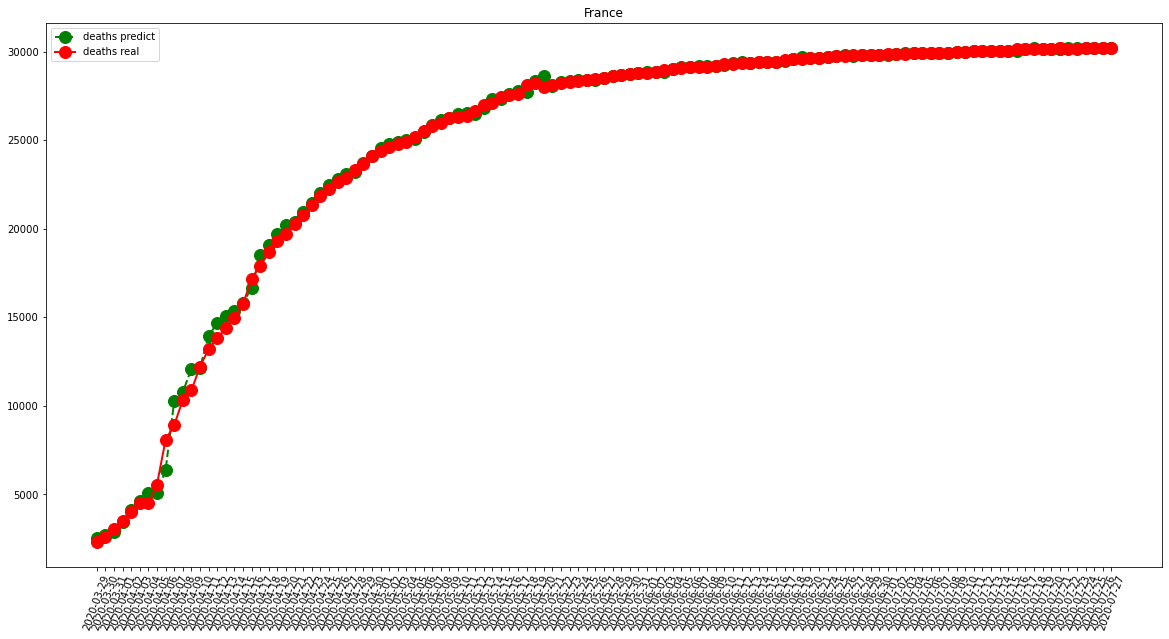

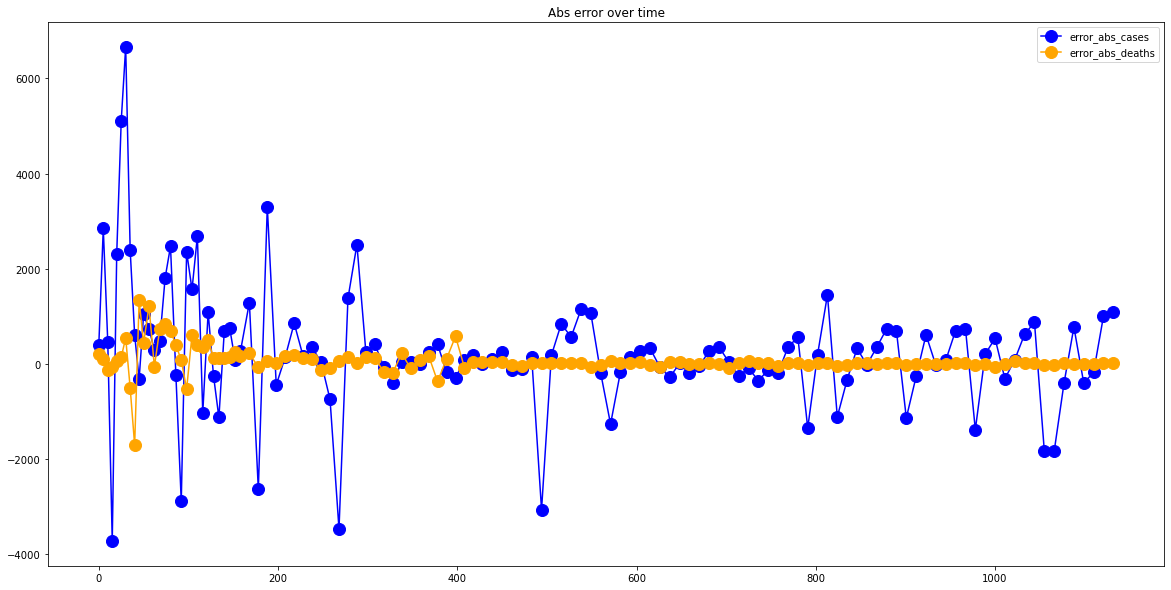

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  330.73333333333335
RMSE =  498.3555290486234
-- Italy performances for deaths --
MAE =  85.31666666666666
RMSE =  270.16167998687996


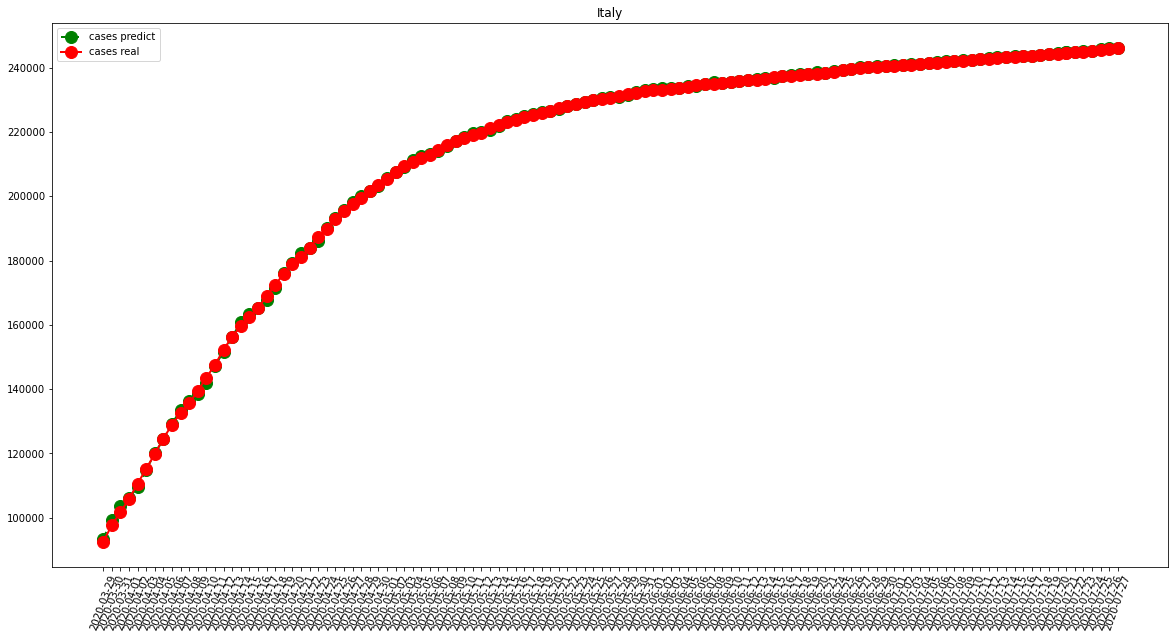

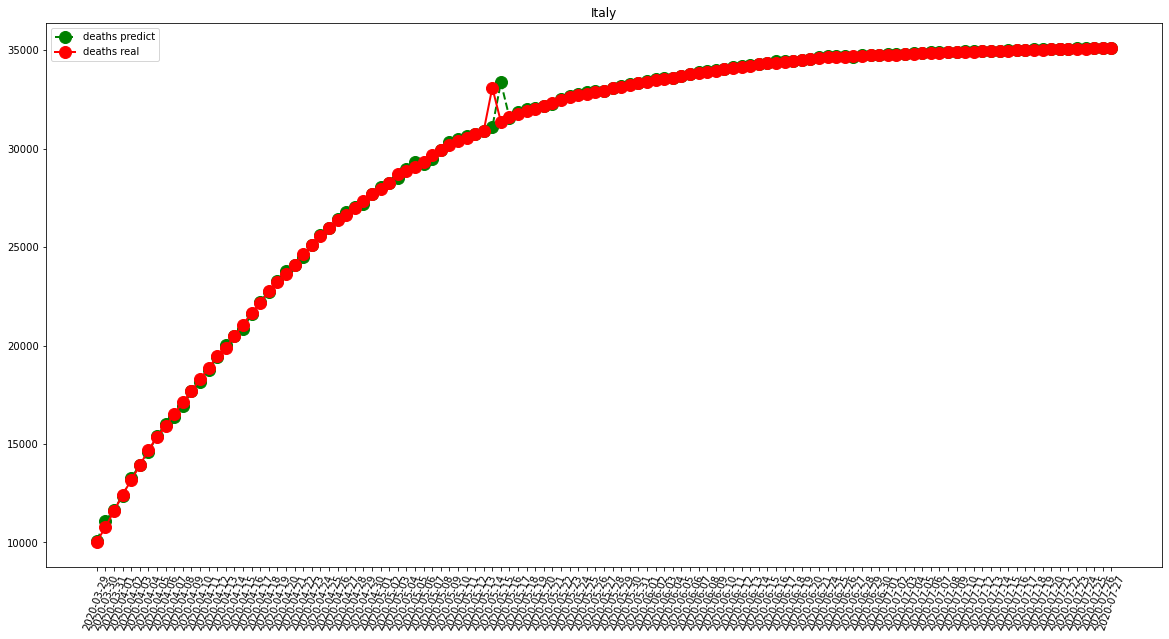

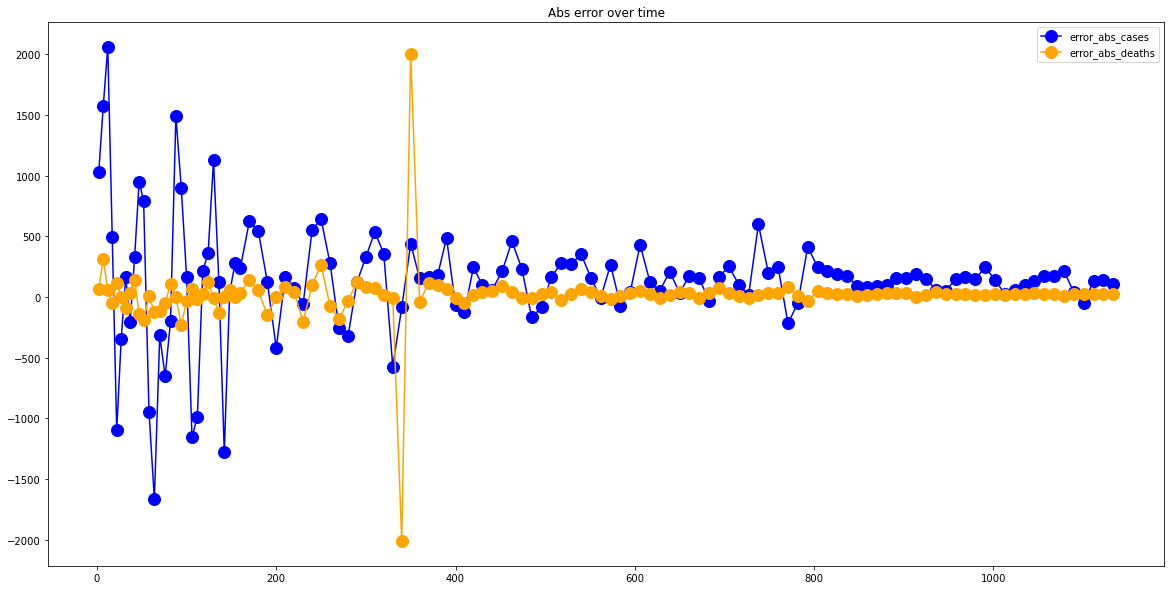

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  960.1
RMSE =  2025.3469990761255
-- Spain performances for deaths --
MAE =  153.16666666666666
RMSE =  370.5521555732742


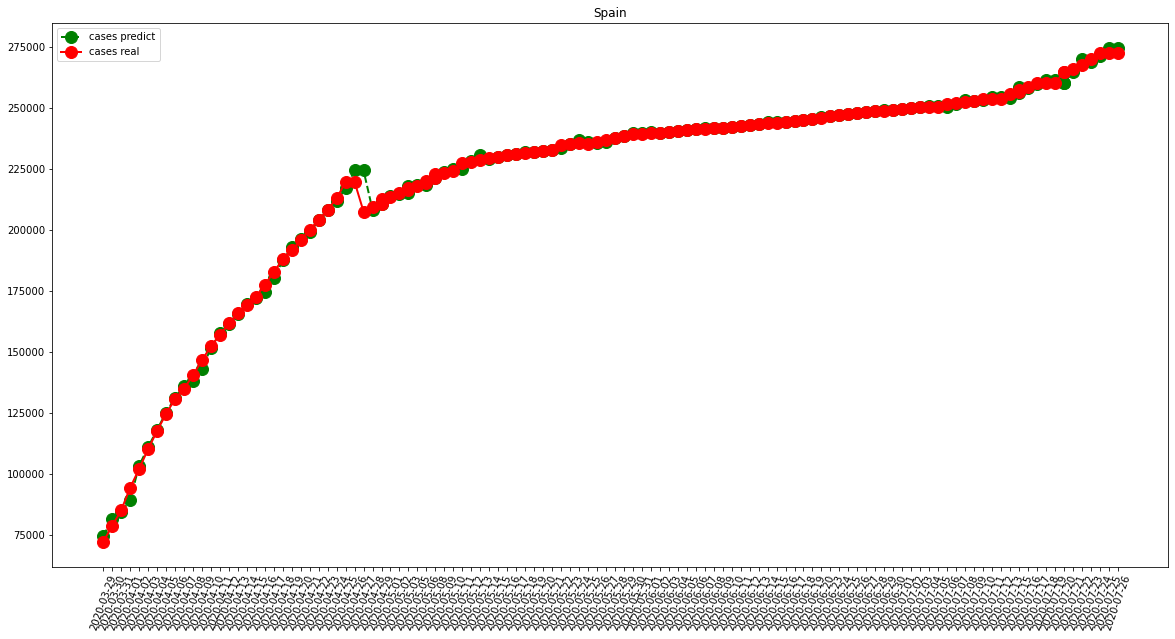

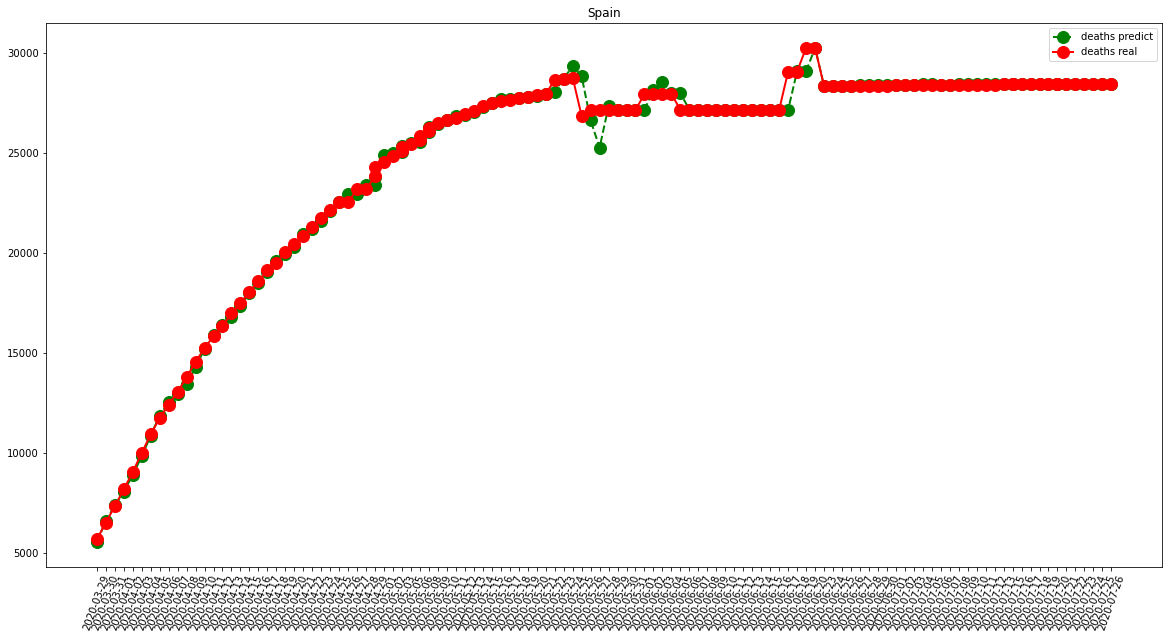

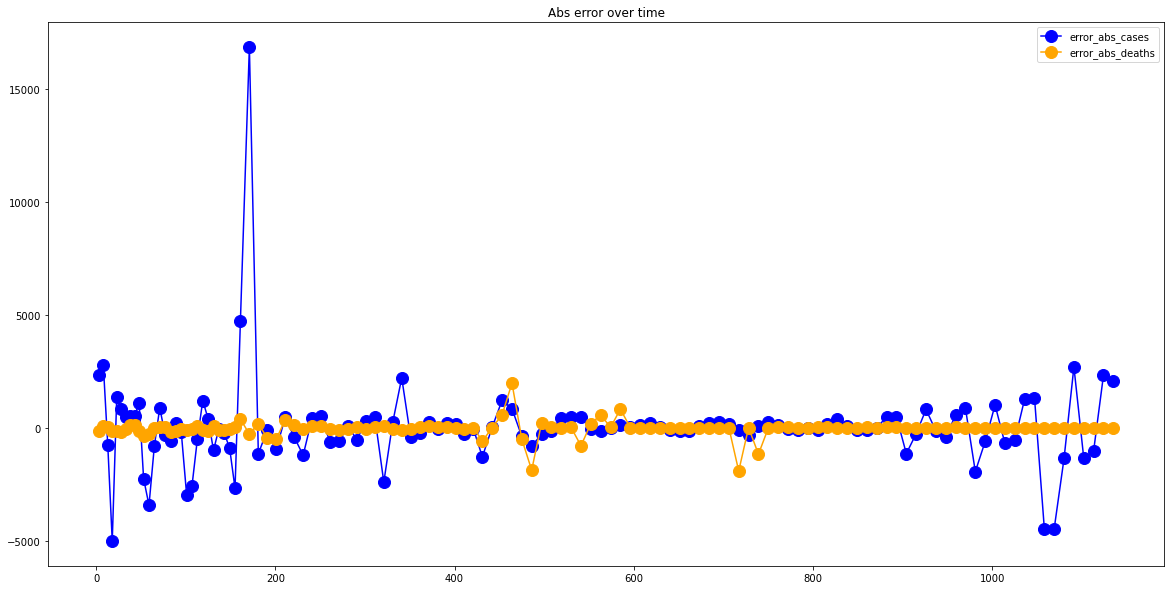

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5614.883333333333
RMSE =  7542.714967658087
-- United States performances for deaths --
MAE =  506.35
RMSE =  733.3899258466354


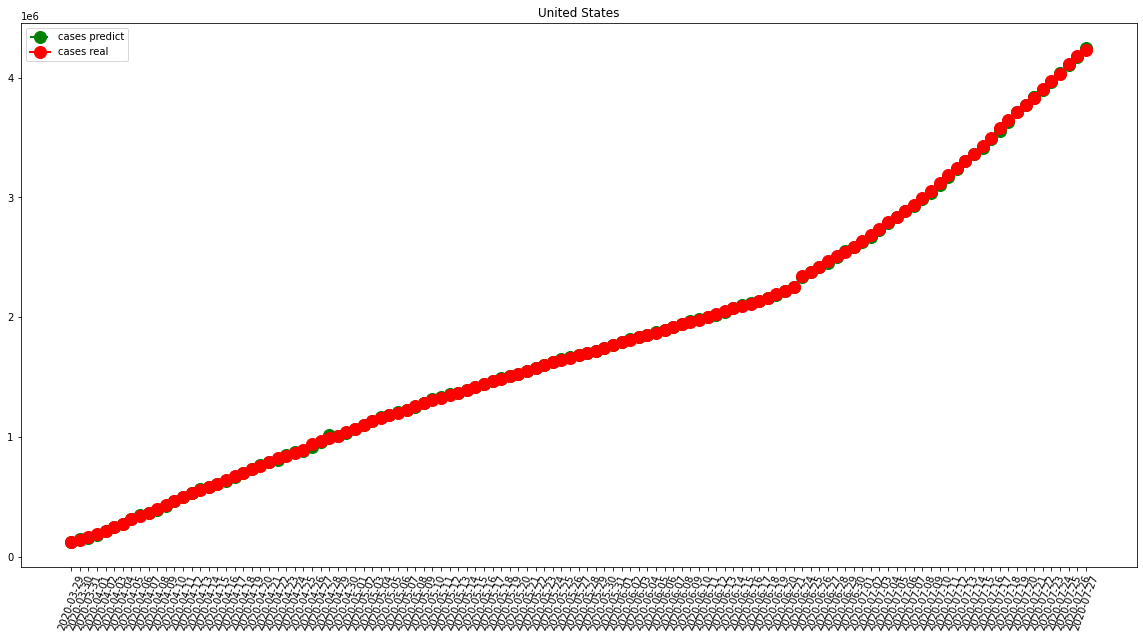

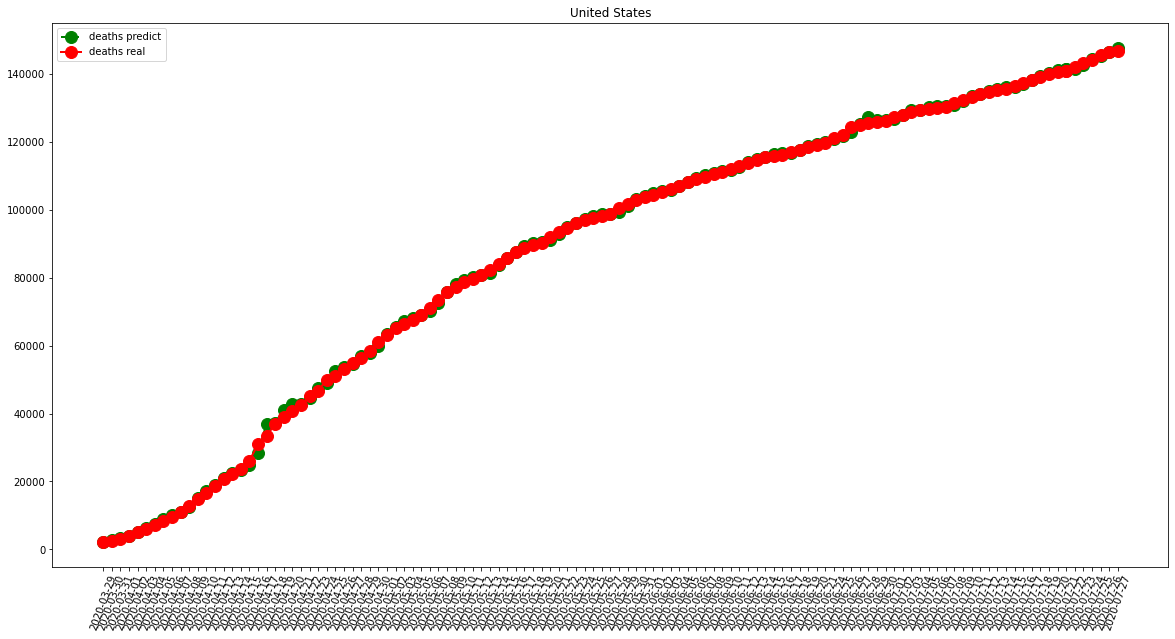

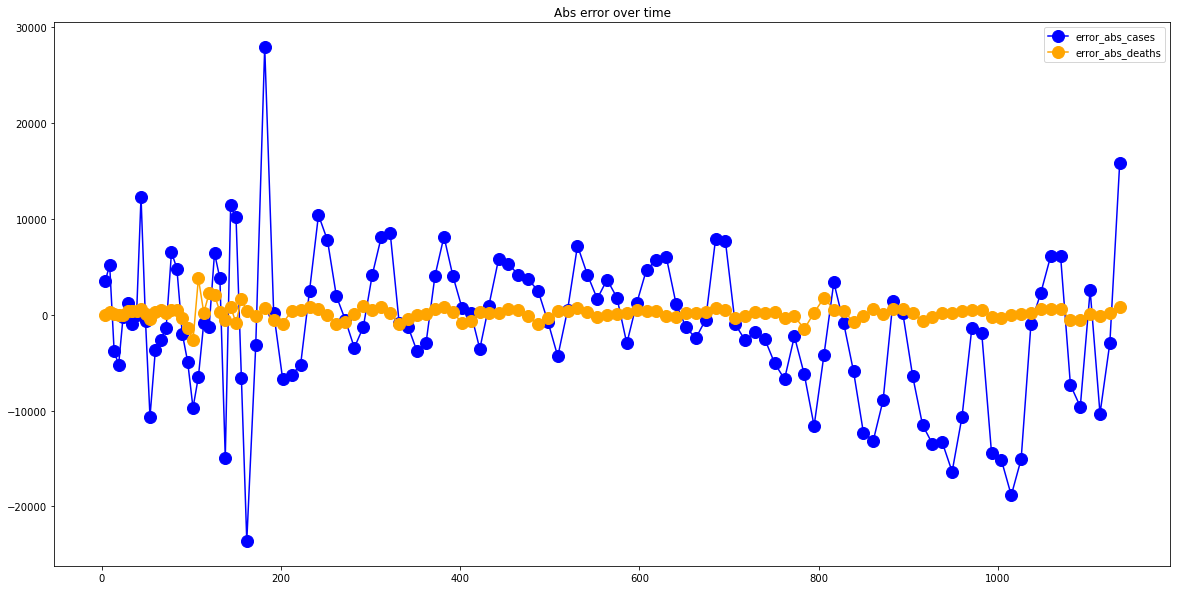

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  78.91666666666667
RMSE =  108.33012815771366
-- China performances for deaths --
MAE =  33.36666666666667
RMSE =  143.3144561212627


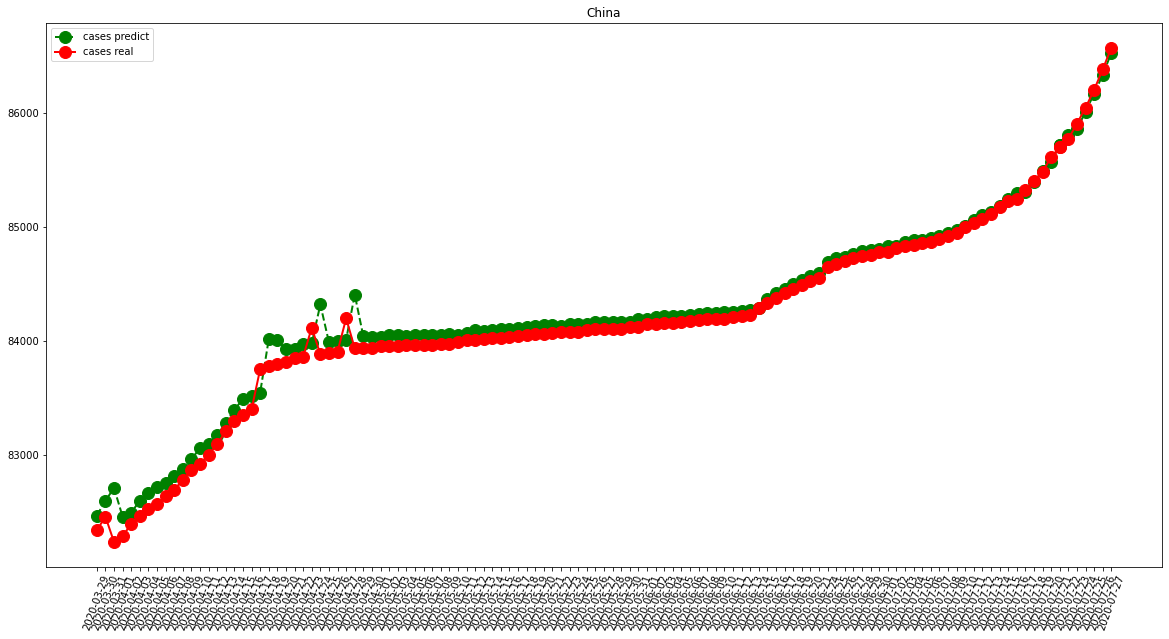

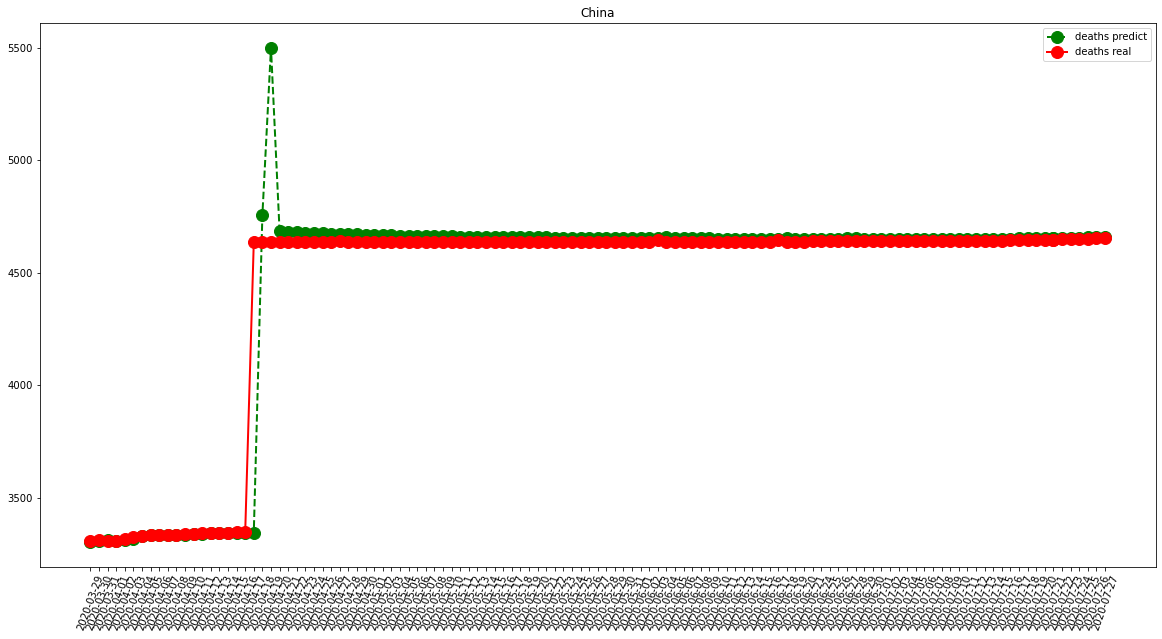

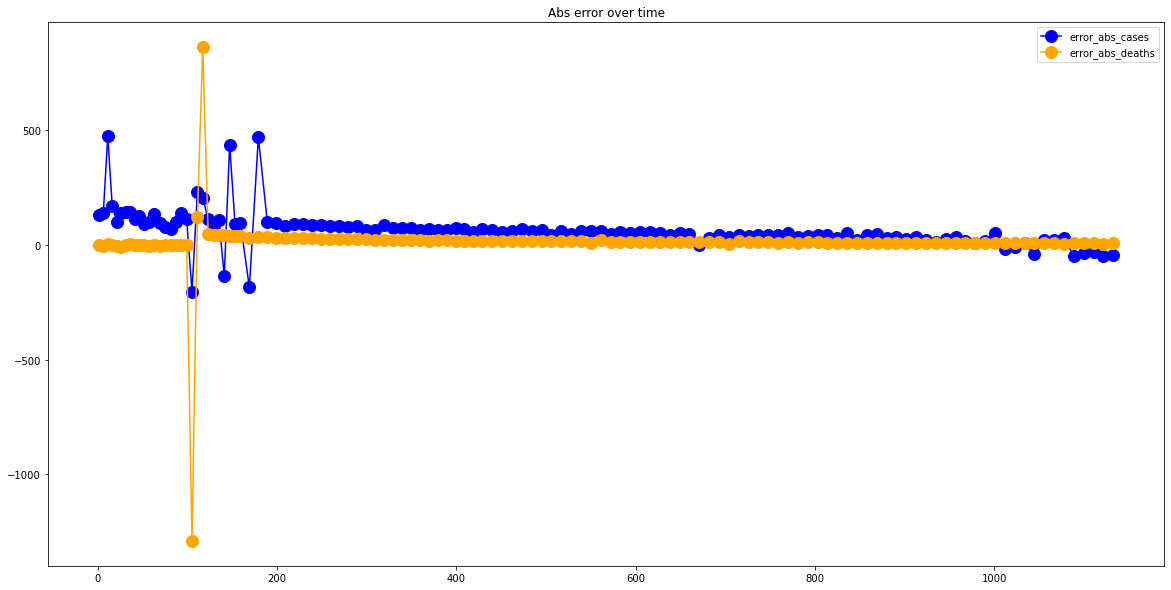

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1322.1630434782608
RMSE =  4350.898866401307
-- United Kingdom performances for deaths --
MAE =  206.30434782608697
RMSE =  511.5208568147752


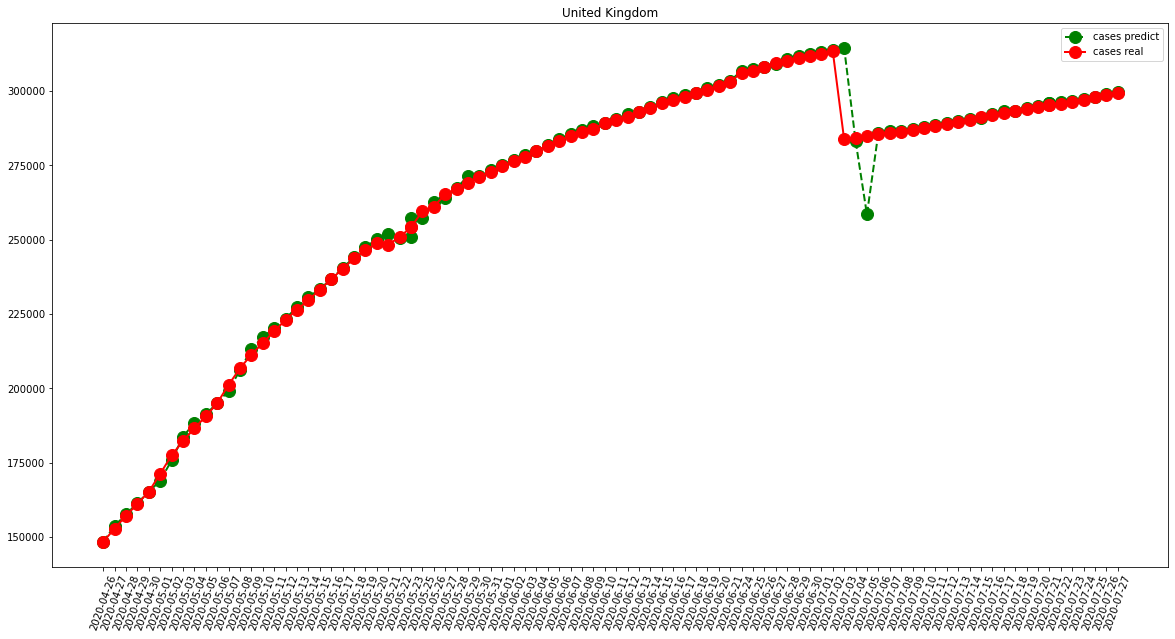

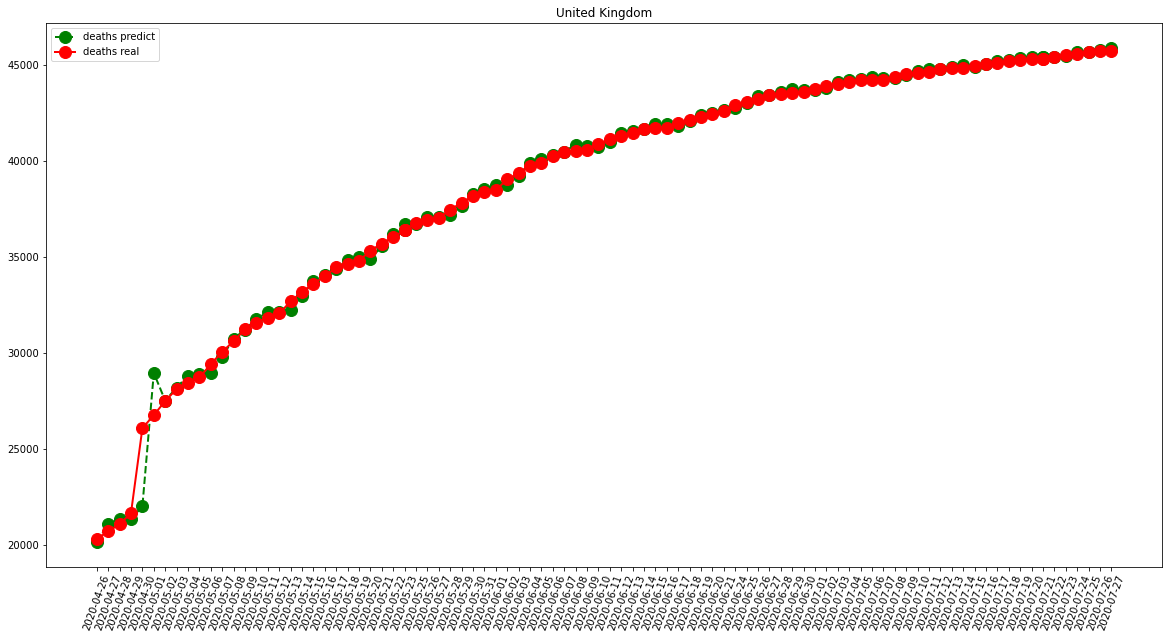

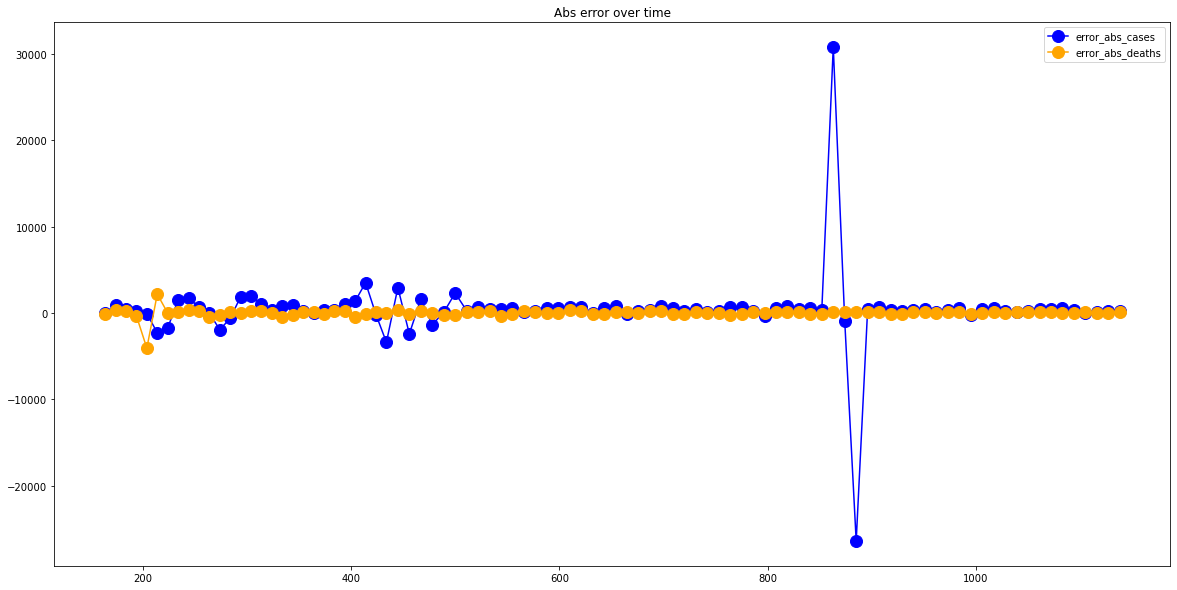

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  294.7282608695652
RMSE =  409.3220402185737
-- Germany performances for deaths --
MAE =  26.195652173913043
RMSE =  45.57506946261014


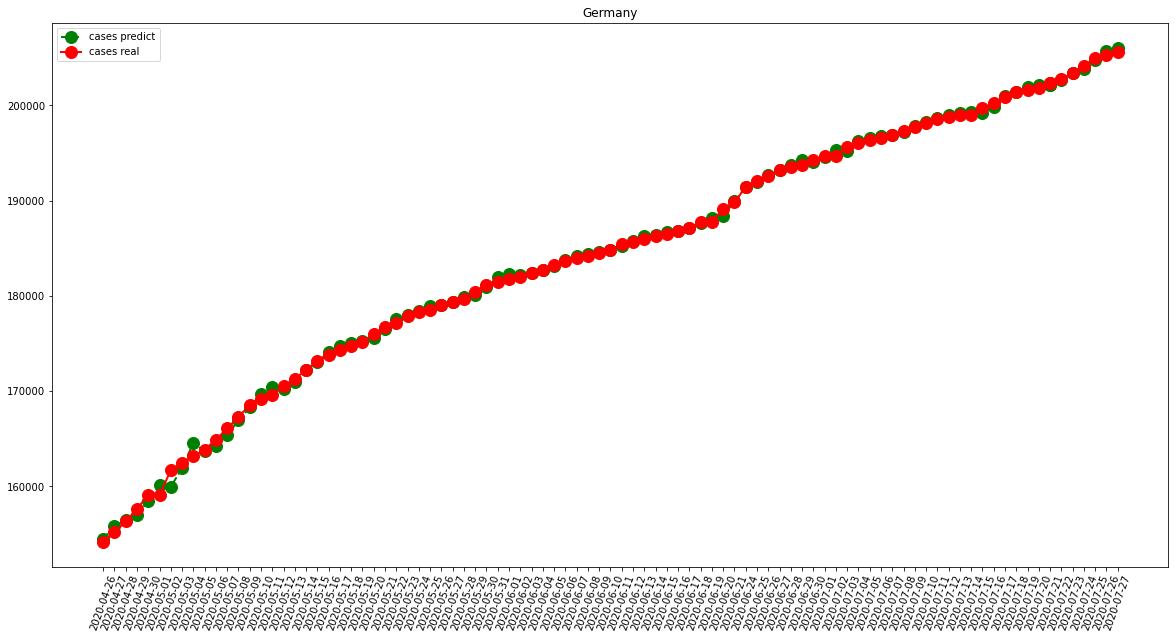

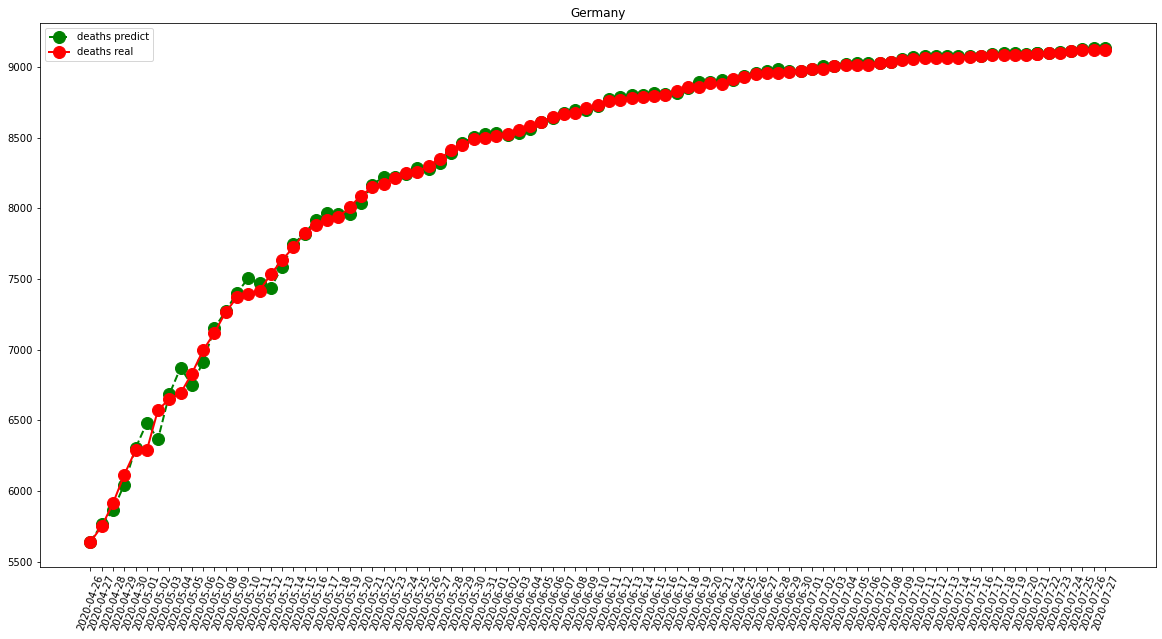

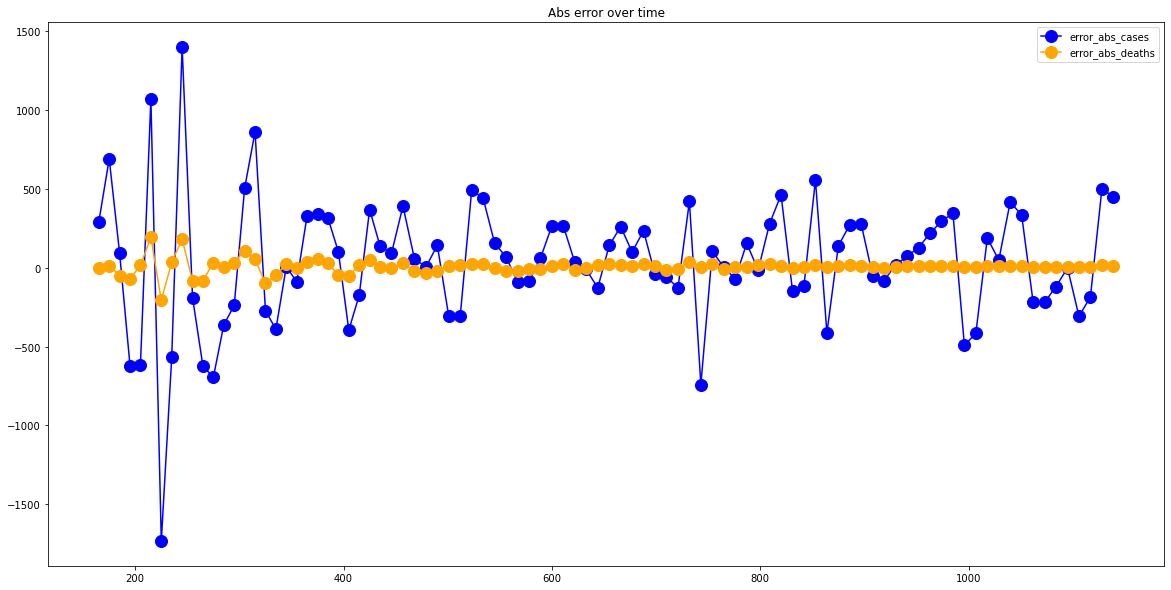

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  534.1195652173913
RMSE =  865.8644022267449
-- Iran performances for deaths --
MAE =  29.73913043478261
RMSE =  67.08738623097749


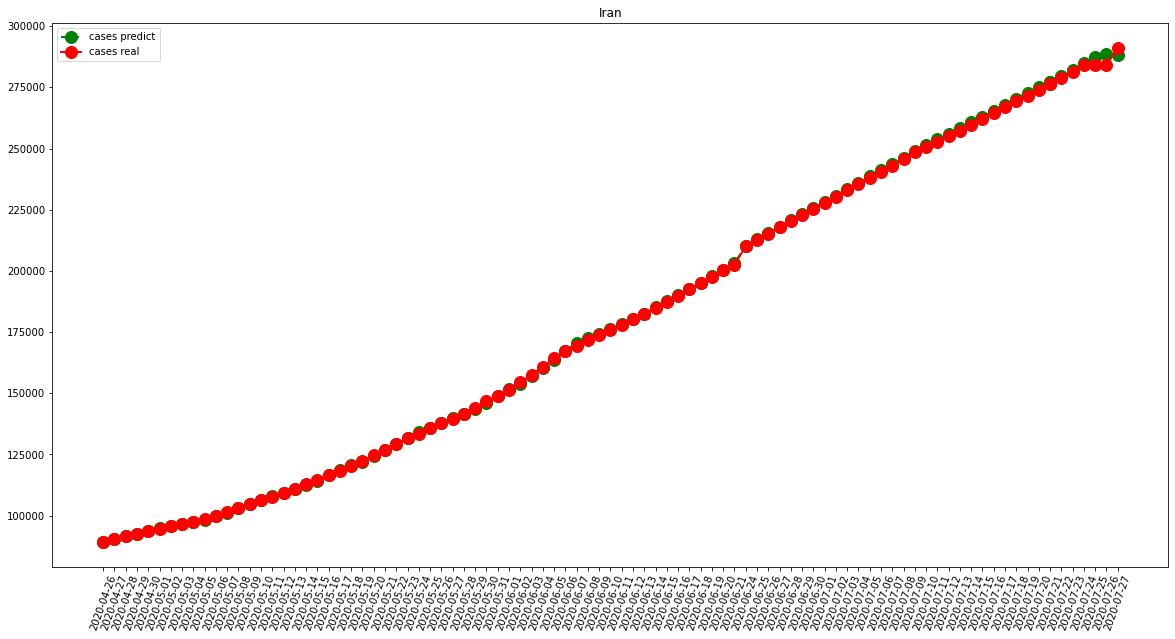

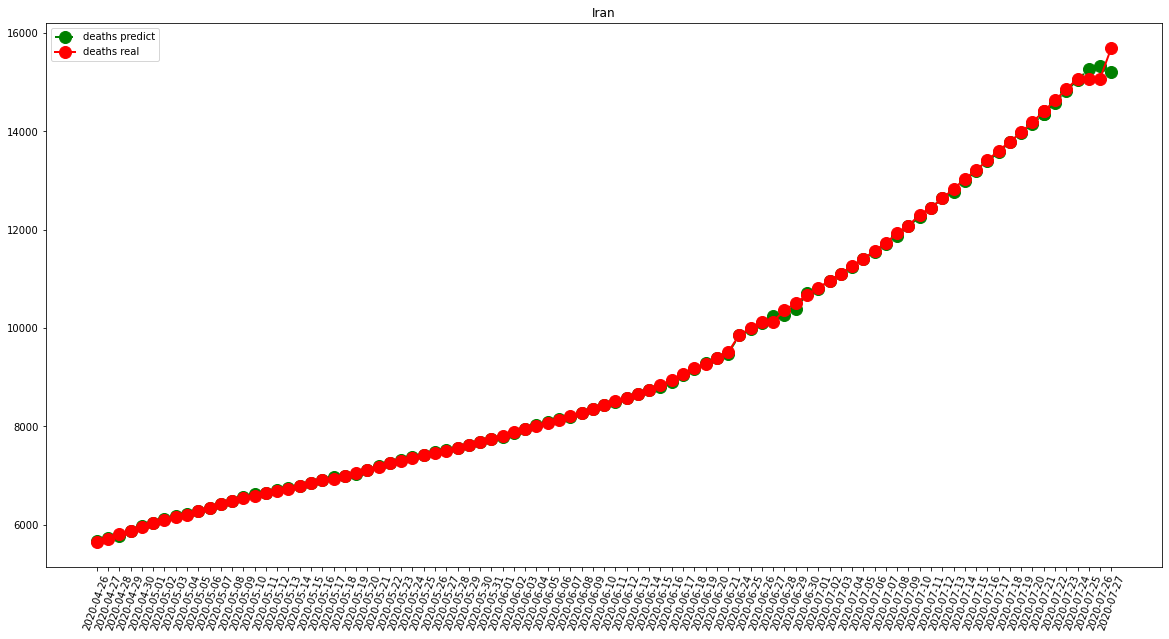

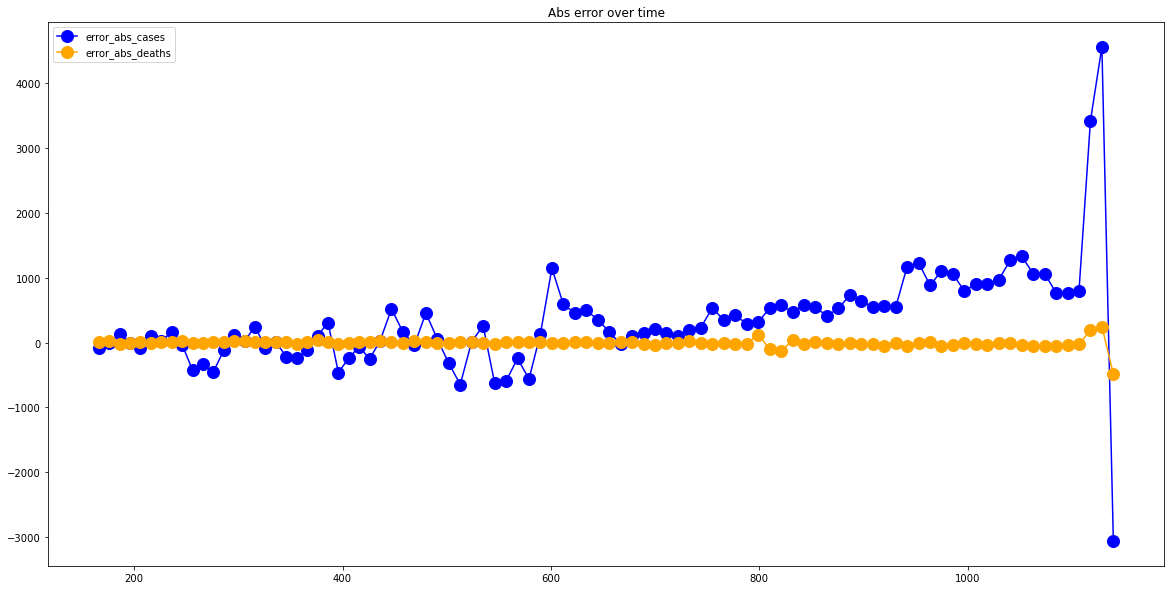

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  209.2608695652174
RMSE =  358.3358880933532
-- Turkey performances for deaths --
MAE =  20.41304347826087
RMSE =  105.82923077749608


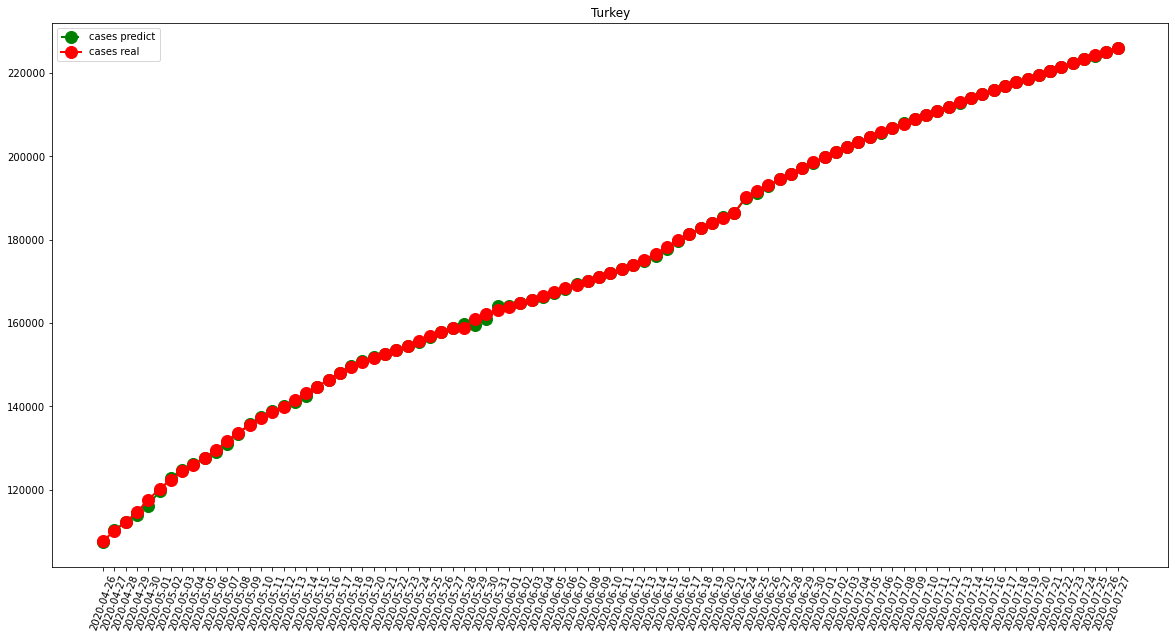

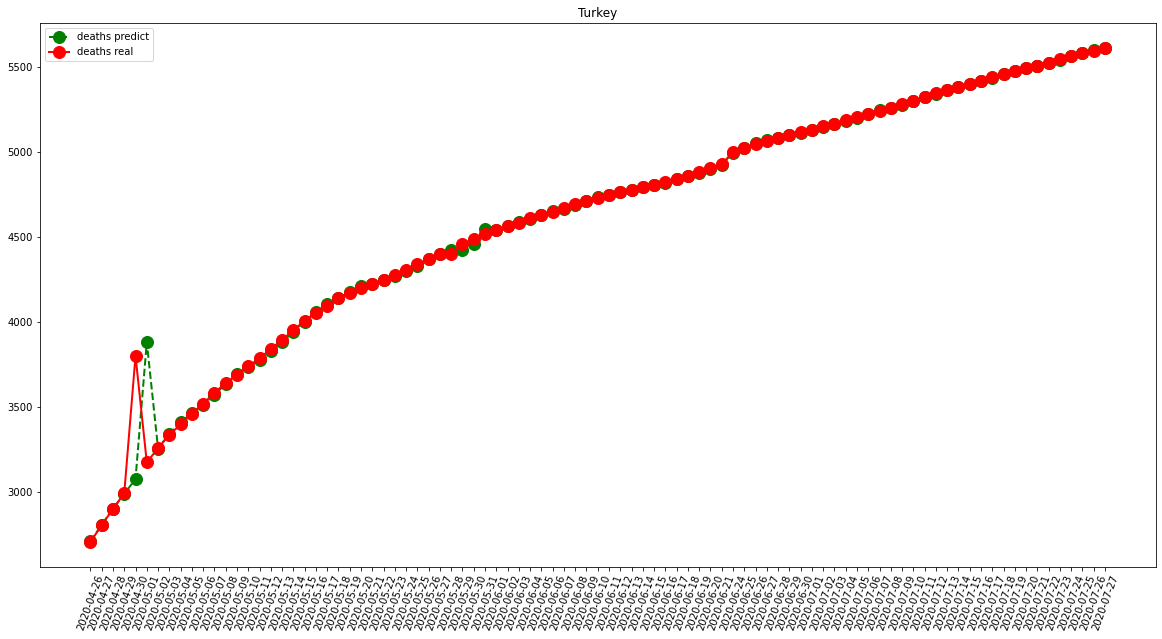

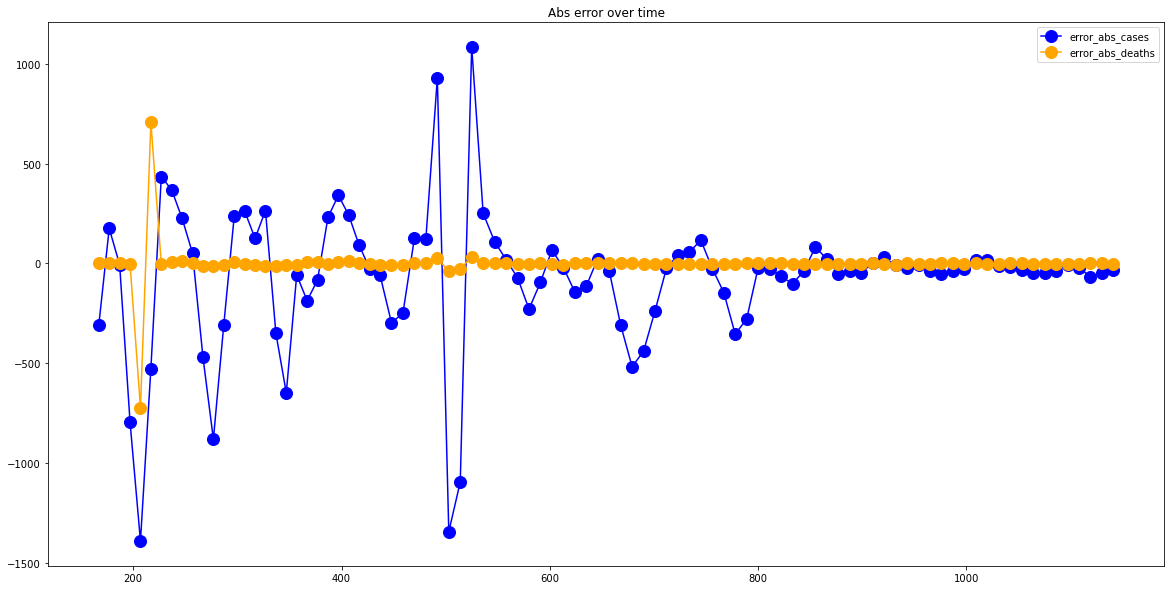

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11041.015384615384
RMSE =  14490.046777012143
-- Brazil performances for deaths --
MAE =  380.32307692307694
RMSE =  468.2724223552584


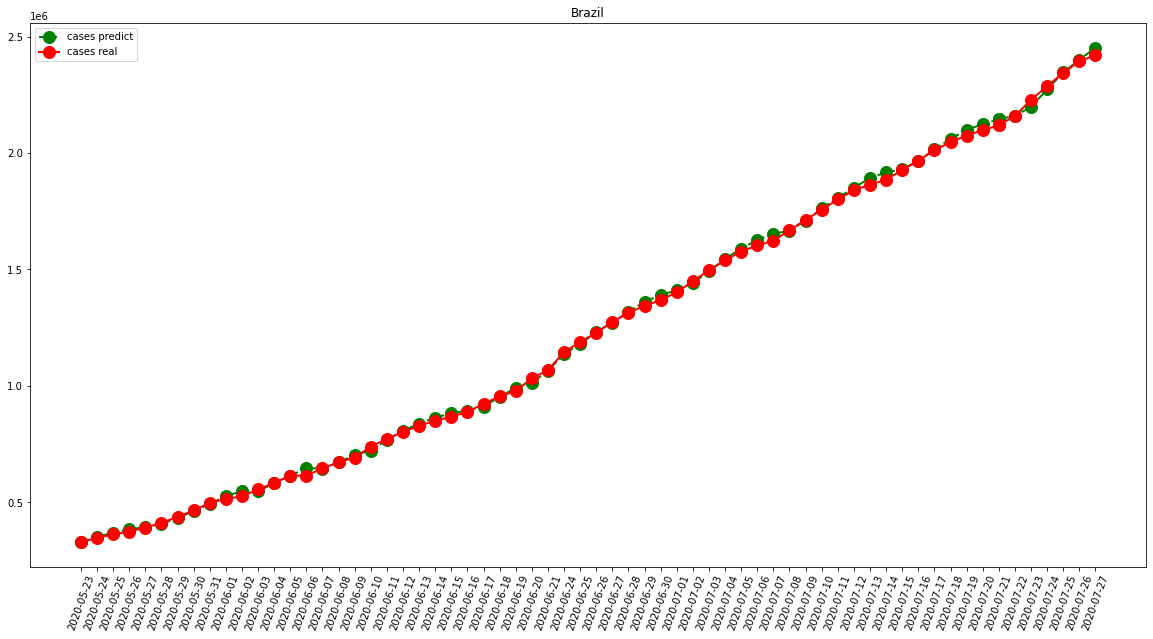

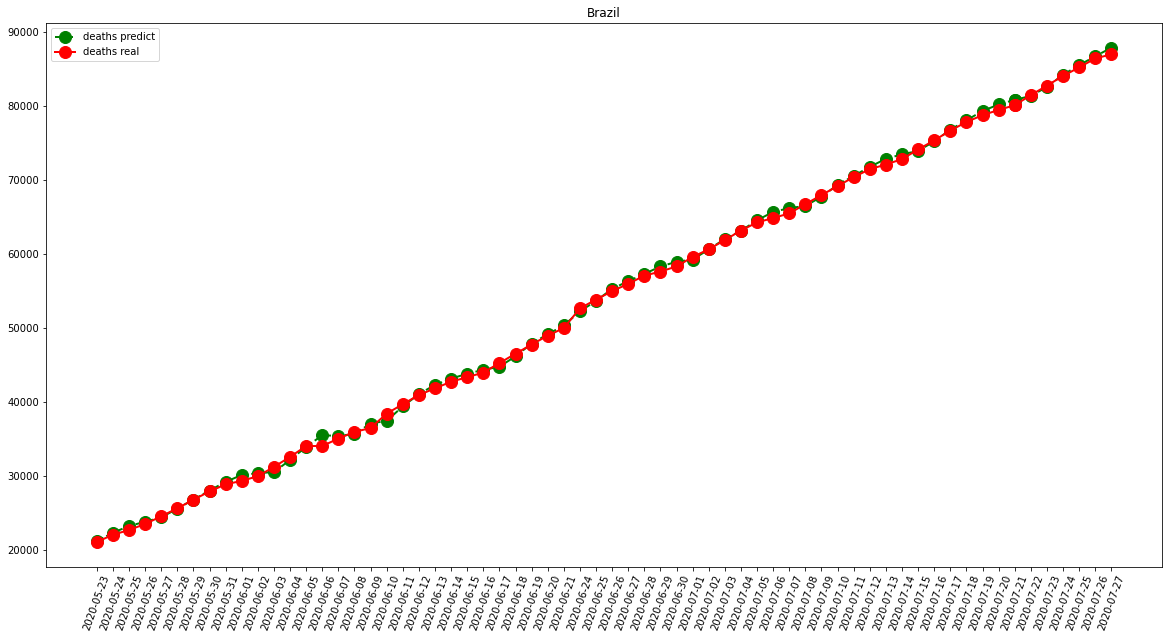

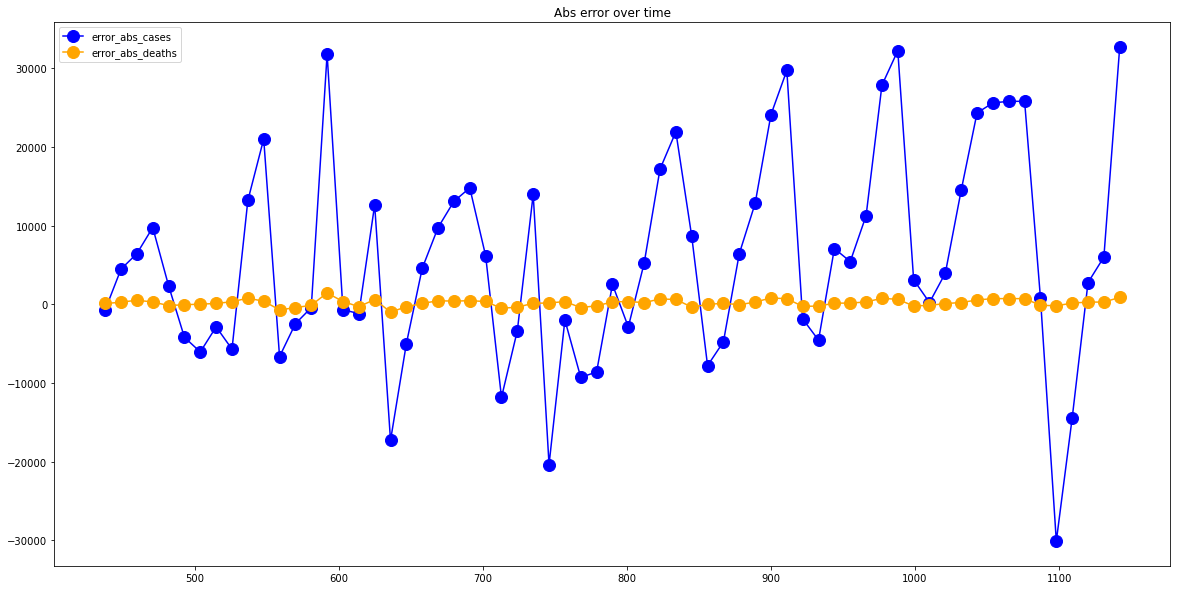

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)